In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
def get_random_crop(image, crop_size):
    x = np.random.randint(0, image.shape[1]-crop_size)
    y = np.random.randint(0, image.shape[1]-crop_size)
    crop = image[y: y + crop_size, x: x + crop_size]
    return crop

In [3]:
import matplotlib.pyplot as plt
import random

augmentation = False

class Lego_Phases():
    IMG_S = 224
    IMG_P_SIZE = 130
    
    phase_1 = "E:/Egyetem/5_felev/Temalab/lego_errors/phase_1"
    phase_2 = "E:/Egyetem/5_felev/Temalab/lego_errors/phase_2"
    phase_3 = "E:/Egyetem/5_felev/Temalab/lego_errors/phase_3"

    LABELS = {phase_1: 0, phase_2: 1, phase_3: 2}
    
    training_data= []
    
    def make_training_data(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_COLOR)
                    img = cv2.resize(img, (self.IMG_S, self.IMG_S))
                    self.training_data.append([np.array(img), np.eye(3)[self.LABELS[label]]]) # állapotszám beáll.
                    
        if augmentation:
            for i in range(10):
                for label in self.LABELS:
                    for f in tqdm(os.listdir(label)):
                        if "jpg" in f:
                            path = os.path.join(label, f)
                            img = cv2.imread(path, cv2.IMREAD_COLOR)
                            img = cv2.resize(img, (self.IMG_P_SIZE, self.IMG_P_SIZE))
                            aug_img = get_random_crop(img, 100)

                            r = random.randint(-1, 1)
                            aug_img = cv2.flip(aug_img, r)
                            self.training_data.append([np.array(aug_img), np.eye(3)[self.LABELS[label]]]) # állapotszám beáll.
        
        np.random.shuffle(self.training_data)
        np.save("training_data224.npy",self.training_data)

        
legophases = Lego_Phases()
legophases.make_training_data()


100%|████████████████████████████████████████████████████████████████████████████████| 585/585 [02:23<00:00,  4.08it/s]


In [4]:

training_data = np.load("training_data224.npy", allow_pickle=True)
print(len(training_data))


1408


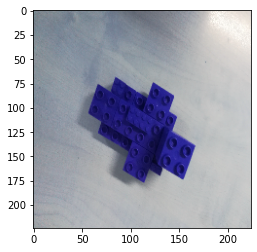

In [5]:
import random

random.shuffle(training_data)

plt.imshow(training_data[460][0])
plt.imshow(training_data[333][0])
plt.imshow(training_data[1001][0])